#                                             Customer Churn Analysis

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
df.shape

(7043, 21)

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

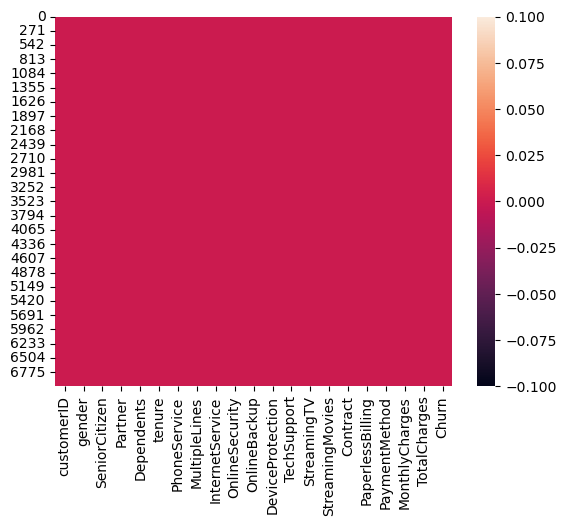

In [16]:
sns.heatmap(df.isnull())

In [17]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [18]:
df['TotalCharges'].nunique ()

6531

In [19]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")
    

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

In [20]:
df.loc[df["TotalCharges"]== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
    df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)
    df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [22]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
np.mean(df["TotalCharges"])

2283.3004408418656

In [27]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [28]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
df.iloc[488,:]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

In [30]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)
print("\n")

Categorical Columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Numerical Columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']




In [31]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [32]:
df.drop("customerID", axis = 1, inplace = True)

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Description of Dataset

In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative or invalid values present.

From the above description we can observe the folllowing:-
1)The counts of all the columns are same which means there is no missing values in the dataset.

2)the mean value is greater than the median in tenure and total charges columns which means data is skewed to the right  in these columns.

3)The data in the column mean value is less thanm the median which means the data in the column is skewed to the left.

4)we can see there is a huge difference between the 75% and max. Hence there are outliers present in the data.

# Data Visualization

## Univariate analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


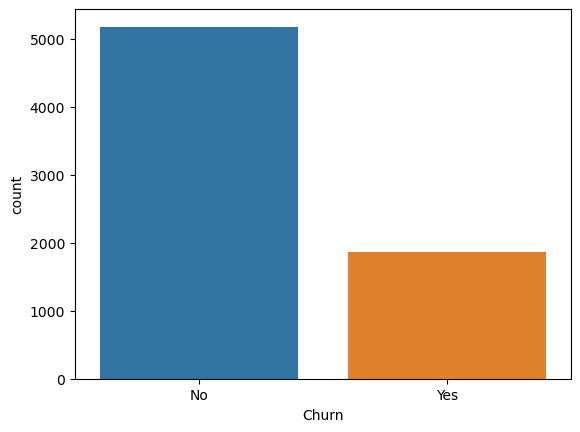

In [36]:
ax = sns.countplot(x = 'Churn', data = df)
print(df['Churn'].value_counts())

As we can observe that the count of 'No Churn' are high as compared to the count of 'Yes Churn'. This leads to class imbalance issue. we will rectify it by resampling method in later part.


Male      3555
Female    3488
Name: gender, dtype: int64


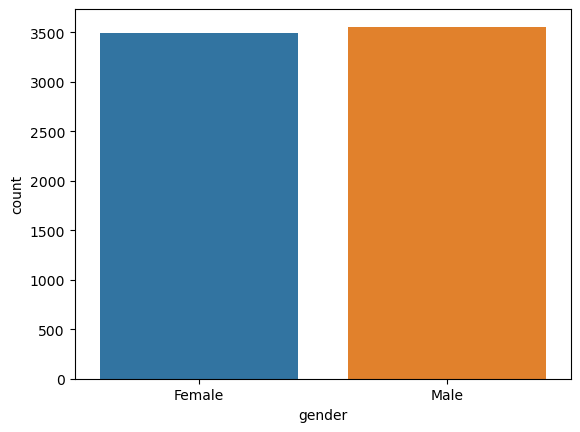

In [37]:
ax = sns.countplot(x = 'gender', data = df)
print(df['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


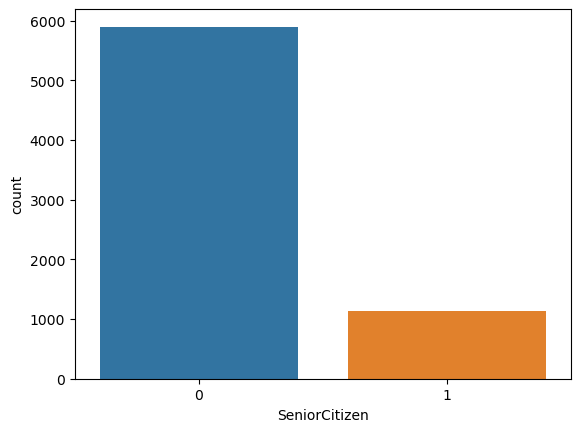

In [38]:
ax = sns.countplot(x = 'SeniorCitizen', data = df)
print(df['SeniorCitizen'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


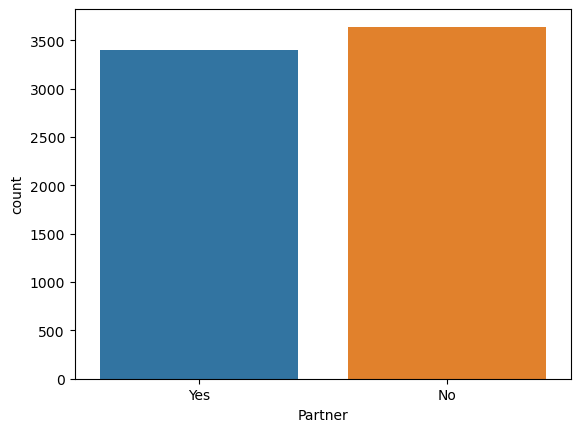

In [39]:
ax = sns.countplot(x = 'Partner', data = df)
print(df['Partner'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


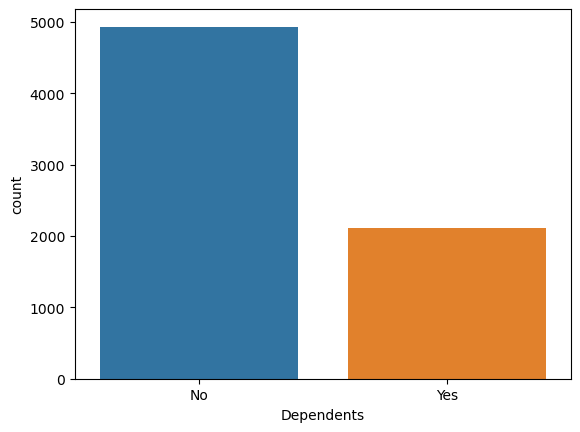

In [40]:
ax = sns.countplot(x = 'Dependents', data = df)
print(df['Dependents'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


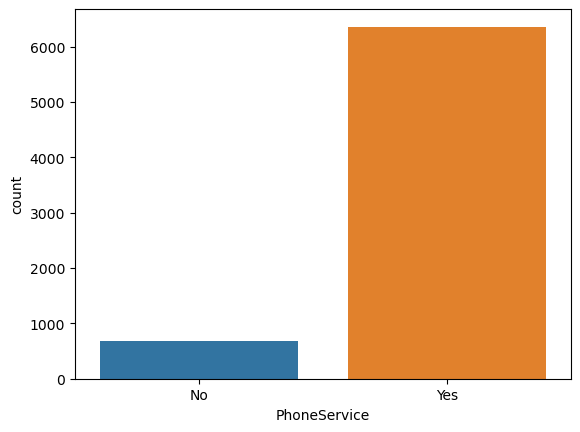

In [41]:
ax = sns.countplot(x = 'PhoneService', data = df)
print(df['PhoneService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


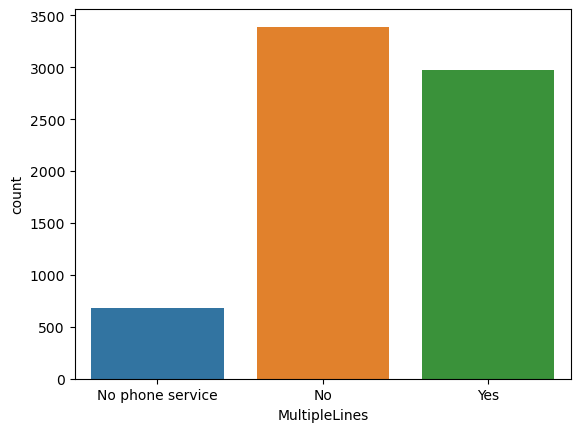

In [42]:
ax = sns.countplot(x = 'MultipleLines', data = df)
print(df['MultipleLines'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


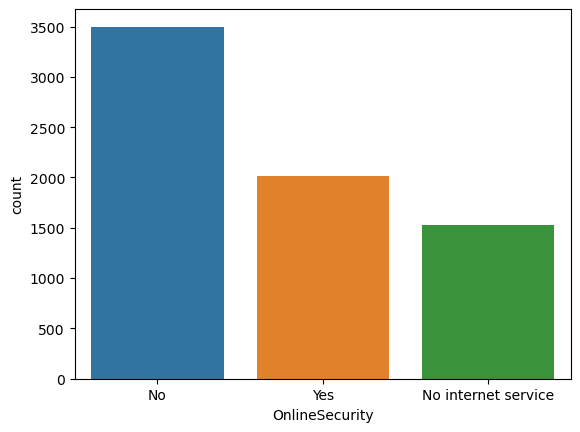

In [43]:
ax = sns.countplot(x = 'OnlineSecurity', data = df)
print(df['OnlineSecurity'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


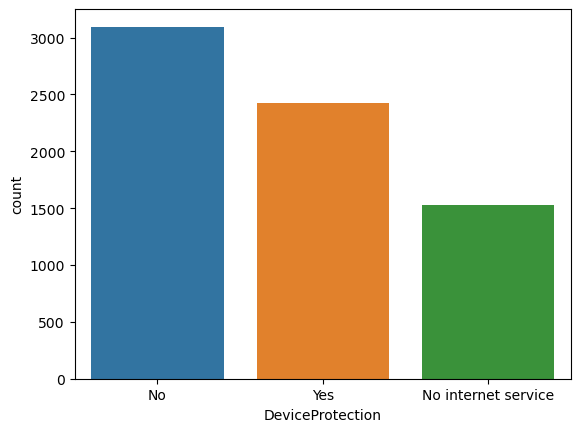

In [44]:
ax = sns.countplot(x = 'DeviceProtection', data = df)
print(df['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


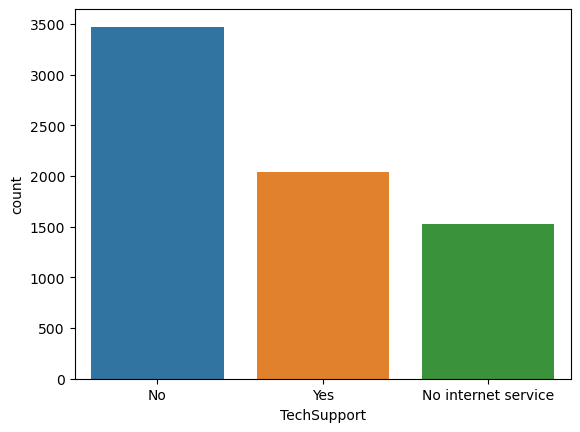

In [45]:
ax = sns.countplot(x = 'TechSupport', data = df)
print(df['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


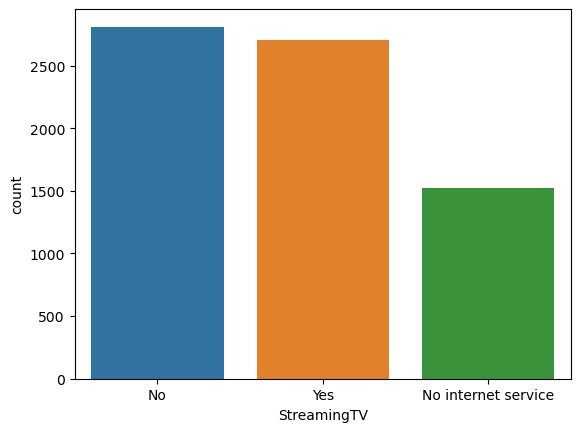

In [46]:
ax = sns.countplot(x = 'StreamingTV', data = df)
print(df['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


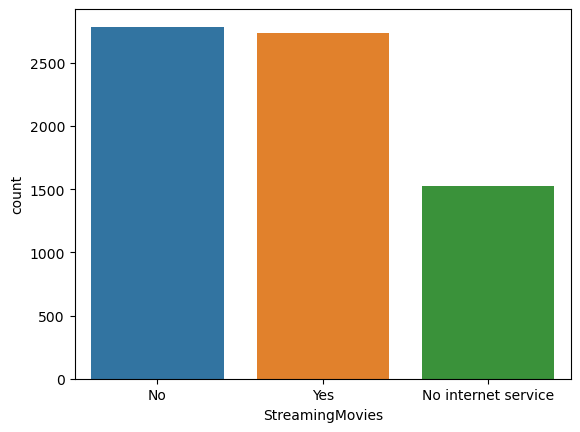

In [47]:
ax = sns.countplot(x = 'StreamingMovies', data = df)
print(df['StreamingMovies'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


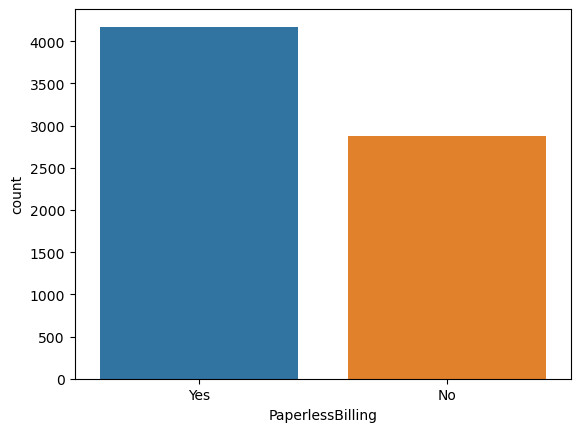

In [48]:
ax = sns.countplot(x = 'PaperlessBilling', data = df)
print(df['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


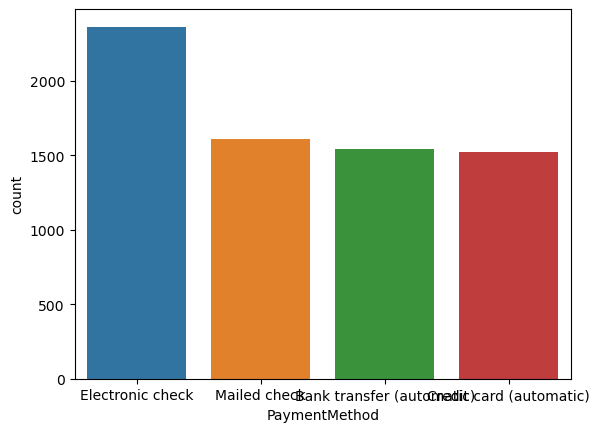

In [52]:
ax = sns.countplot(x = 'PaymentMethod', data = df)
print(df['PaymentMethod'].value_counts())

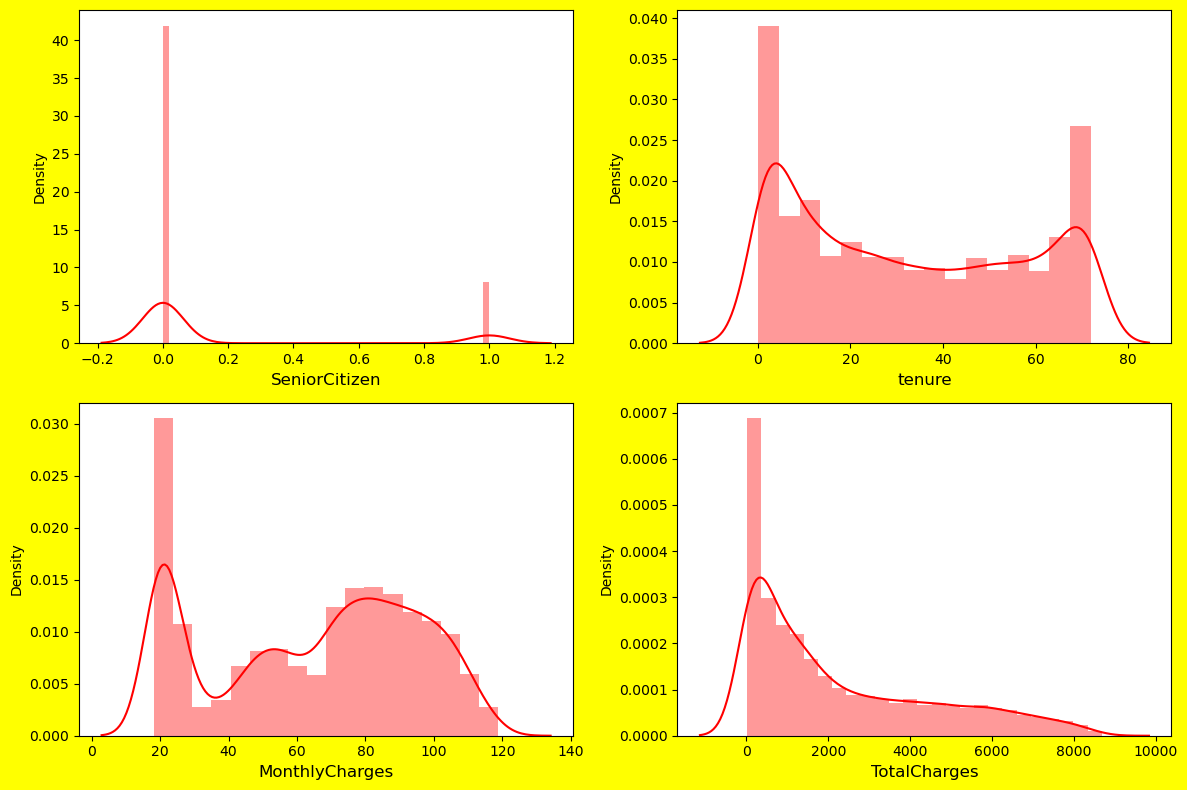

In [53]:
plt.figure(figsize = (12,8), facecolor = "yellow")
plotnumber = 1

for col in numerical_col:
    if plotnumber<=4:
        ax= plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color = "r")
        plt.xlabel(col,fontsize = 12)
        plt.yticks( fontsize = 10)
    plotnumber+=1
plt.tight_layout()

from the above distribution plots we can notice that the data almost looks normal, except the SeniorCitizen and TotalCharges column which is skewed towards right.

# Bivariate analysis

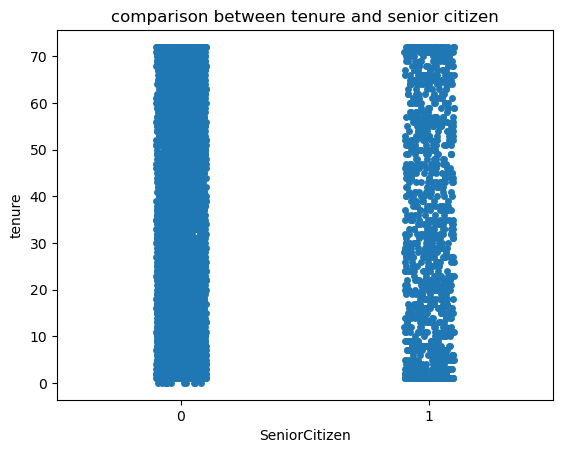

In [54]:
#comparing tenure and senior citizen
plt.title("comparison between tenure and senior citizen")
sns.stripplot(x = 'SeniorCitizen', y = 'tenure', data = df)
plt.show()

from the graph we can find that there is no significant relation between the tenure and senior citizen. Here both the features are equal in length.

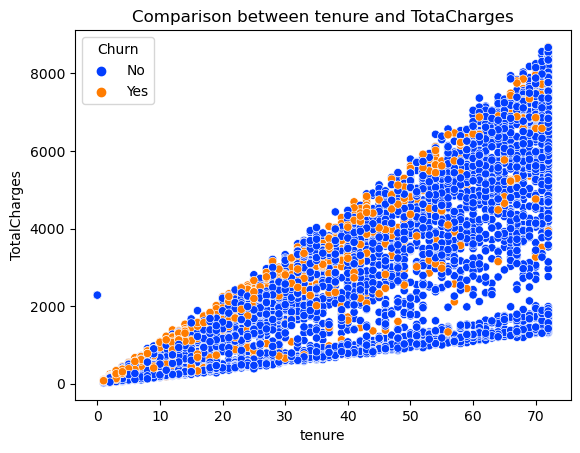

In [55]:
# comparing tenure and total charges
plt.title("Comparison between tenure and TotaCharges")
sns.scatterplot(x = 'tenure', y = 'TotalCharges', data = df, hue = "Churn", palette = 'bright')
plt.show()

here we can notice a strong linear relationship between the features.
as the tenure is increasing the TotalCharges is also increasing rapidly and the customers with low tenure services then there is a high chance of churn.

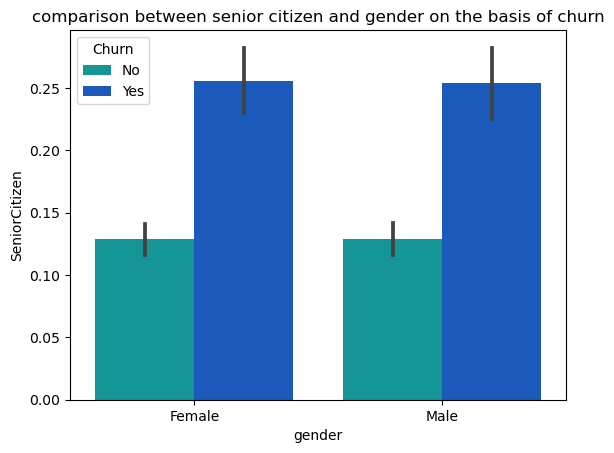

In [56]:
plt.title("comparison between senior citizen and gender on the basis of churn")
sns.barplot(x = 'gender', y = 'SeniorCitizen', data = df, palette = 'winter_r', hue = 'Churn')
plt.show()

from the graph we can study that if the customers are senior citizen then the chances of churn are high. The gender of the customers don't affectinng the churn rate.

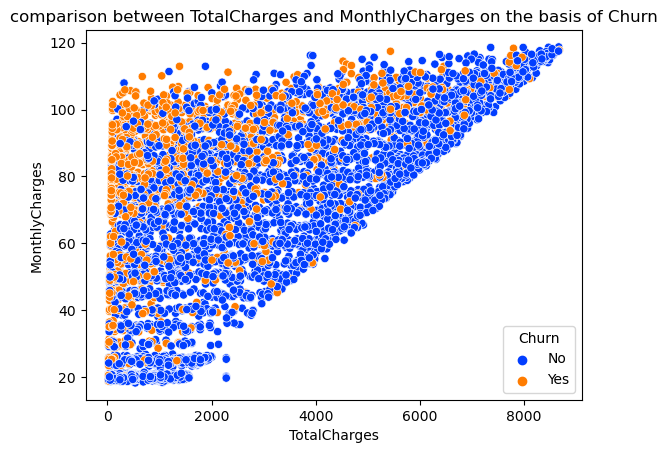

In [57]:
plt.title("comparison between TotalCharges and MonthlyCharges on the basis of Churn")  
sns.scatterplot(x = "TotalCharges", y = "MonthlyCharges", hue = "Churn", palette = "bright", data = df)
plt.show()

here we can find a strong linear relationship between the total charges and monthly charges.
If the monthly charges are high, then there is a high chance of chrn rate of the customers as the total charges also increases.

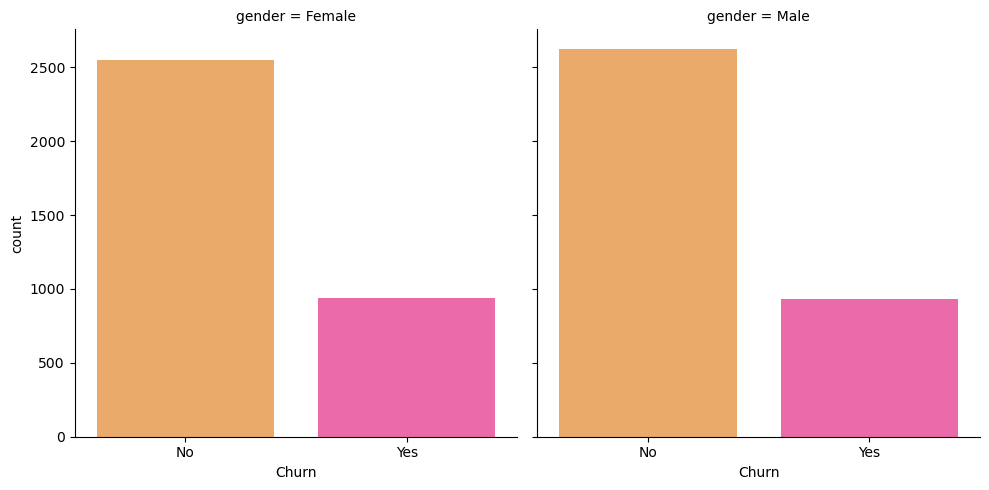

In [58]:
#Checking churn level and gender
sns.catplot(x = 'Churn', col = 'gender', data = df, kind = 'count',palette = 'spring_r')
plt.show()

here we can see that the churn rate remains unaffected by the gender of the customers

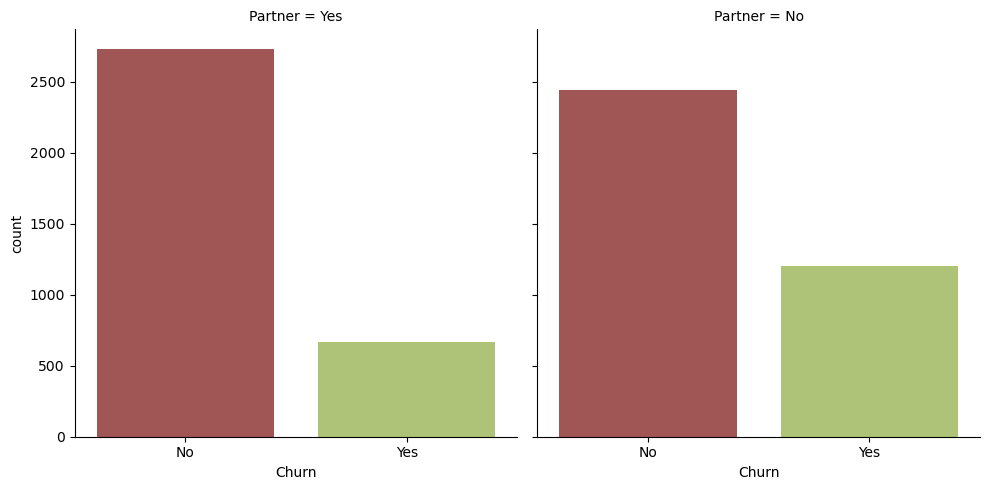

In [59]:
 #checking churn level and partner
sns.catplot(x = 'Churn', col = 'Partner', data = df, kind = 'count', palette = 'tab20b_r')
plt.show()

from the above graph we can see that the person having no partner have the churn rate more in comparison to the person having partner

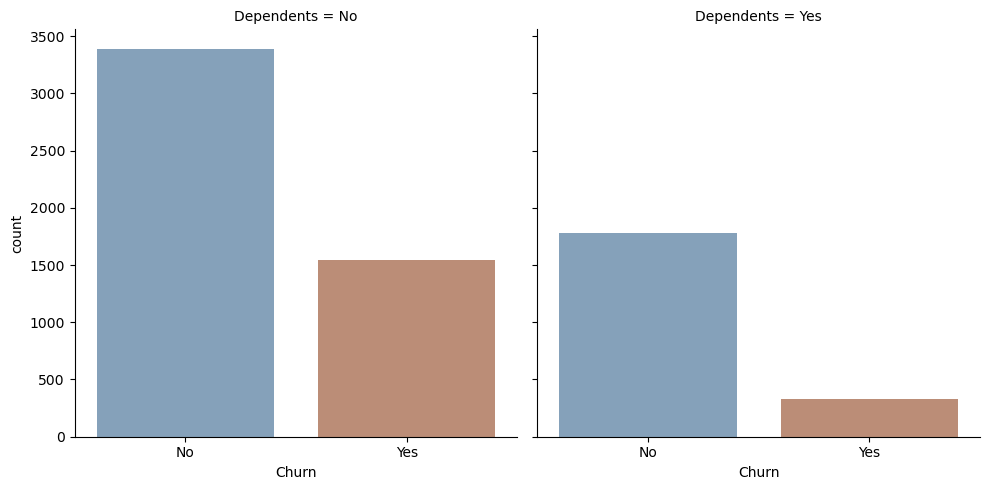

In [60]:
#checking churn level in dependents
sns.catplot(x = 'Churn', col = 'Dependents', data = df, kind = 'count', palette = 'twilight_shifted')
plt.show()

the person who have any dependency have high churn rate than the person wo have no depedency.

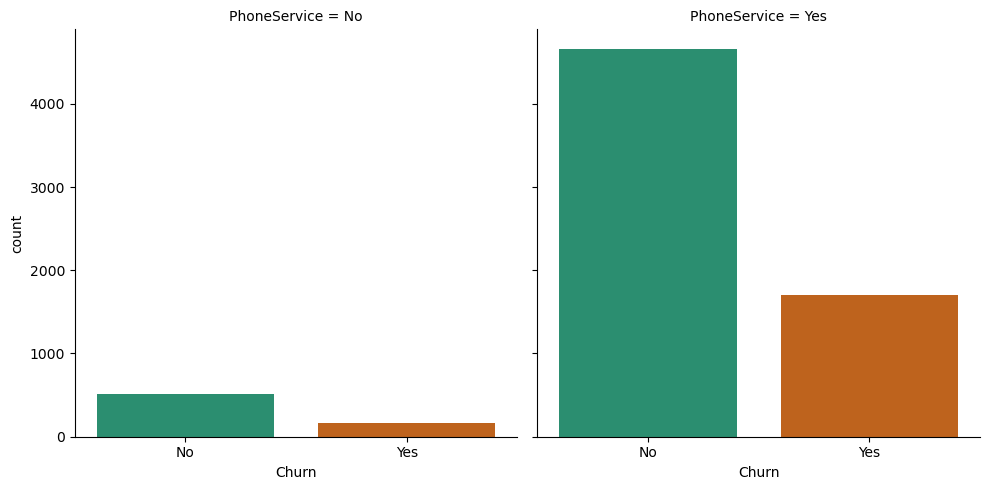

In [61]:
#checking churn level in phone service
sns.catplot(x = 'Churn', col = 'PhoneService', data = df, kind = 'count', palette = 'Dark2')
plt.show()

here we can see that the persons having phone service have higher tendency of getting churned.

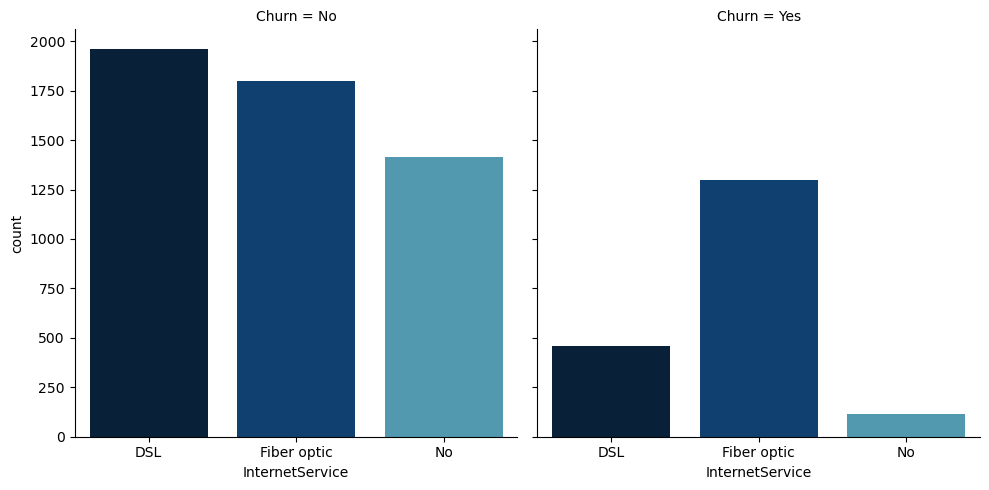

In [62]:
#checking churn levels in InternetService
sns.catplot(x = 'InternetService', col = 'Churn', kind = 'count', palette = 'ocean', data = df)
plt.show()

Here we can see that the person using fibre optic have generally high churn rate in comparison to the person using DSL.

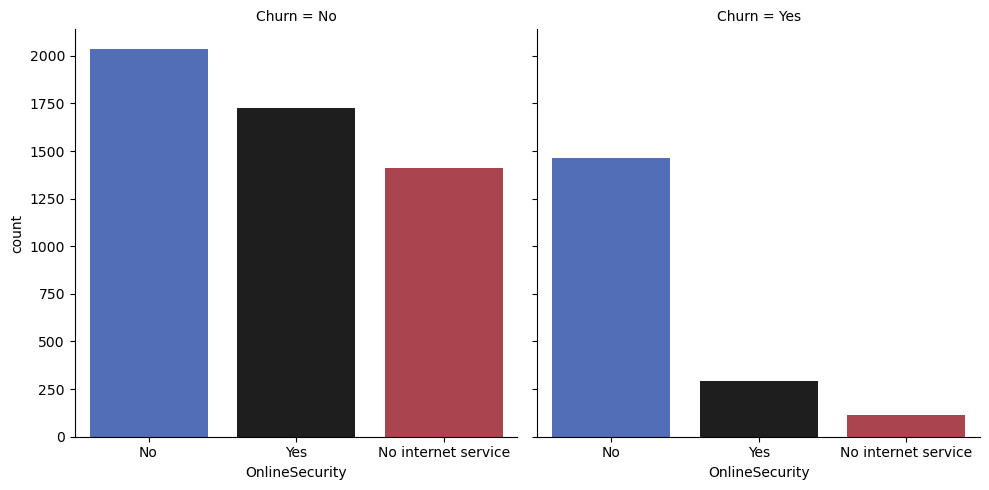

In [63]:
# checking churn level in OnlineSecurity
sns.catplot(x = 'OnlineSecurity', col = 'Churn', kind = 'count', data = df, palette = 'icefire')
plt.show()

Here we can see that the person having no internet service have very low churn rate and the person who do not have online security have huigh tendejcy of getting churned.

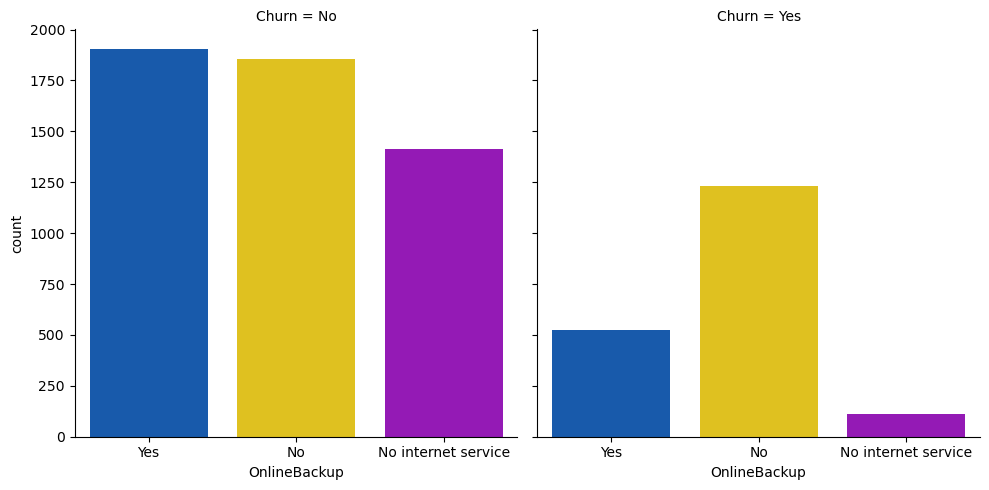

In [64]:
#checking churn level in online backup
sns.catplot(x = 'OnlineBackup', col = 'Churn', palette = 'prism', kind = 'count', data = df)
plt.show()


Here we can see that the customers having no internet service have very low churn rate and the customers having no online backup have the highest churn rate than the customers having online backup.

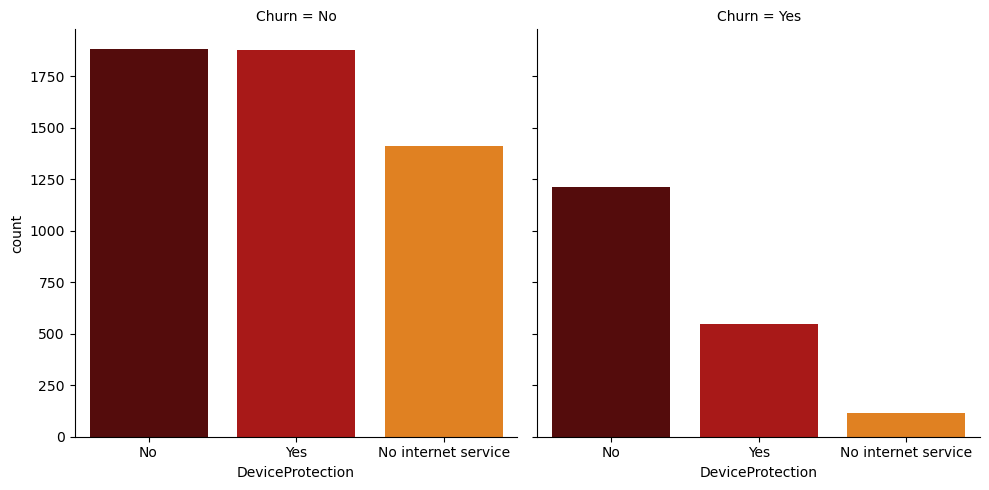

In [65]:
#checking churn level in DeviceProtection
sns.catplot(x = 'DeviceProtection', col = 'Churn', palette = 'gist_heat', kind = 'count', data = df)
plt.show()

the customers don't having device protection have generally a high churn rate.

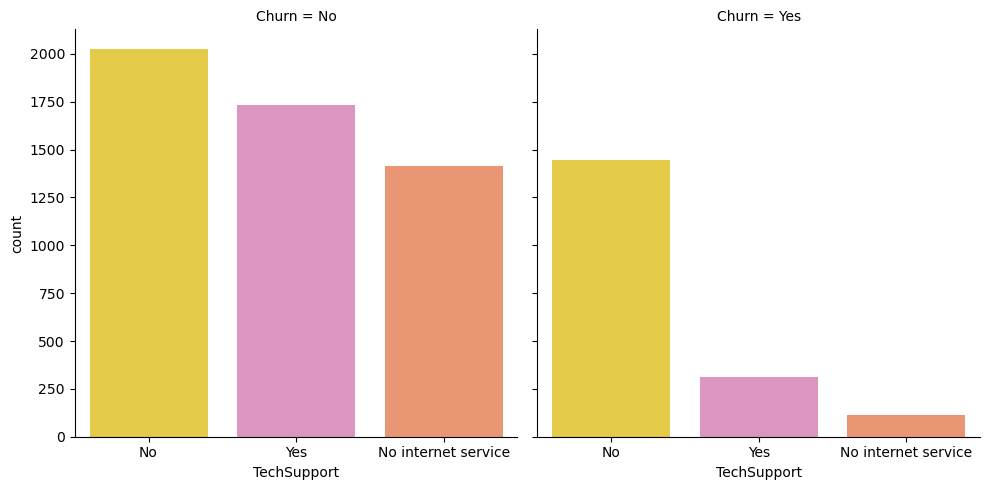

In [66]:
# checking churn level in tech support
sns.catplot(x = 'TechSupport', col = 'Churn', palette = "Set2_r", kind = 'count', data = df)
plt.show()

The customers without having tech support have a higher churn rate than the customers having tech support

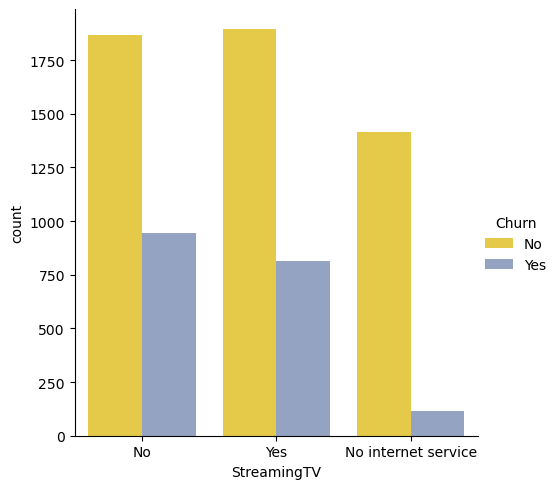

In [67]:
# checking churn level in streaming tv
sns.catplot(x = 'StreamingTV', hue = 'Churn', palette = "Set2_r", kind = 'count', data = df)
plt.show()

here we can see that the churn rate is nearly same whether the customer is streaming tv or not.

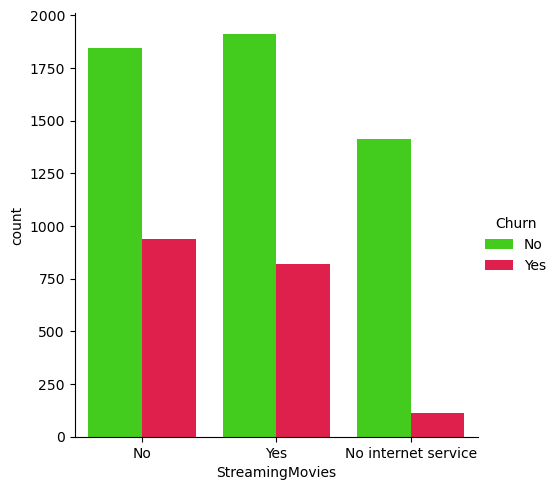

In [68]:
# checking churn level in streaming movies
sns.catplot(x = 'StreamingMovies', hue = 'Churn', palette = 'prism', data = df, kind = 'count')
plt.show()

here we can see that the churn rate is nearly same whether the customer is streaming movies or not

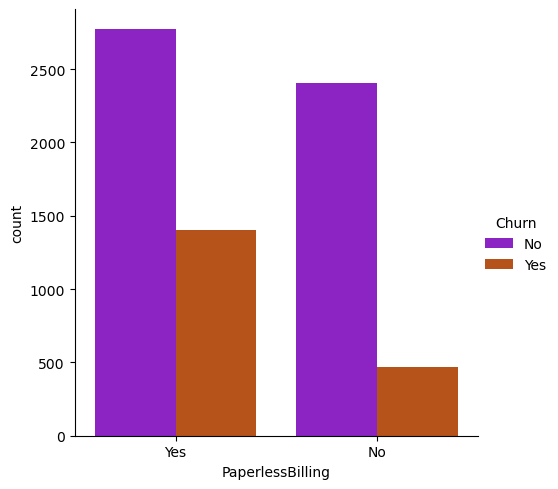

In [69]:
# checking churn level in paperless billing
sns.catplot(x= 'PaperlessBilling', hue = 'Churn', palette = 'gnuplot', kind = 'count', data = df)
plt.show()

The customers who prefer paperless billing have high churn rate.

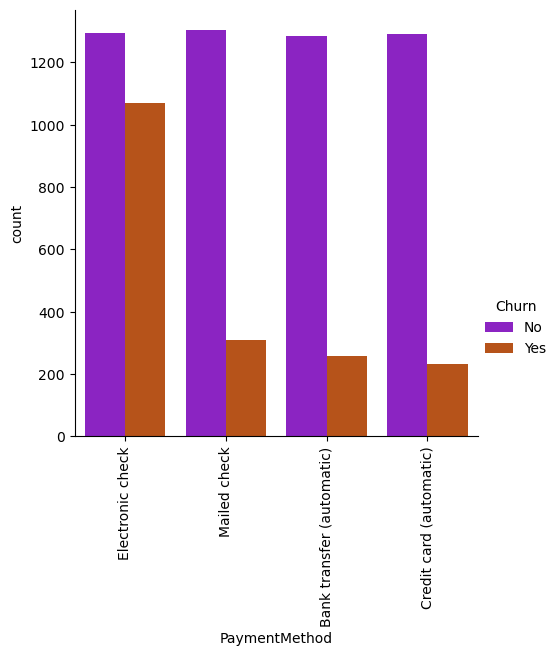

In [70]:
# checking churn level in payment method
sns.catplot(x = 'PaymentMethod', hue = 'Churn', palette = 'gnuplot', kind = 'count', data = df)
plt.xticks(rotation =90)
plt.show()

Here we can see that the customers paying through electronic check have a higher churn rate and the customers paying by automatic payments have lower churn rate.

# Multivariate analysis

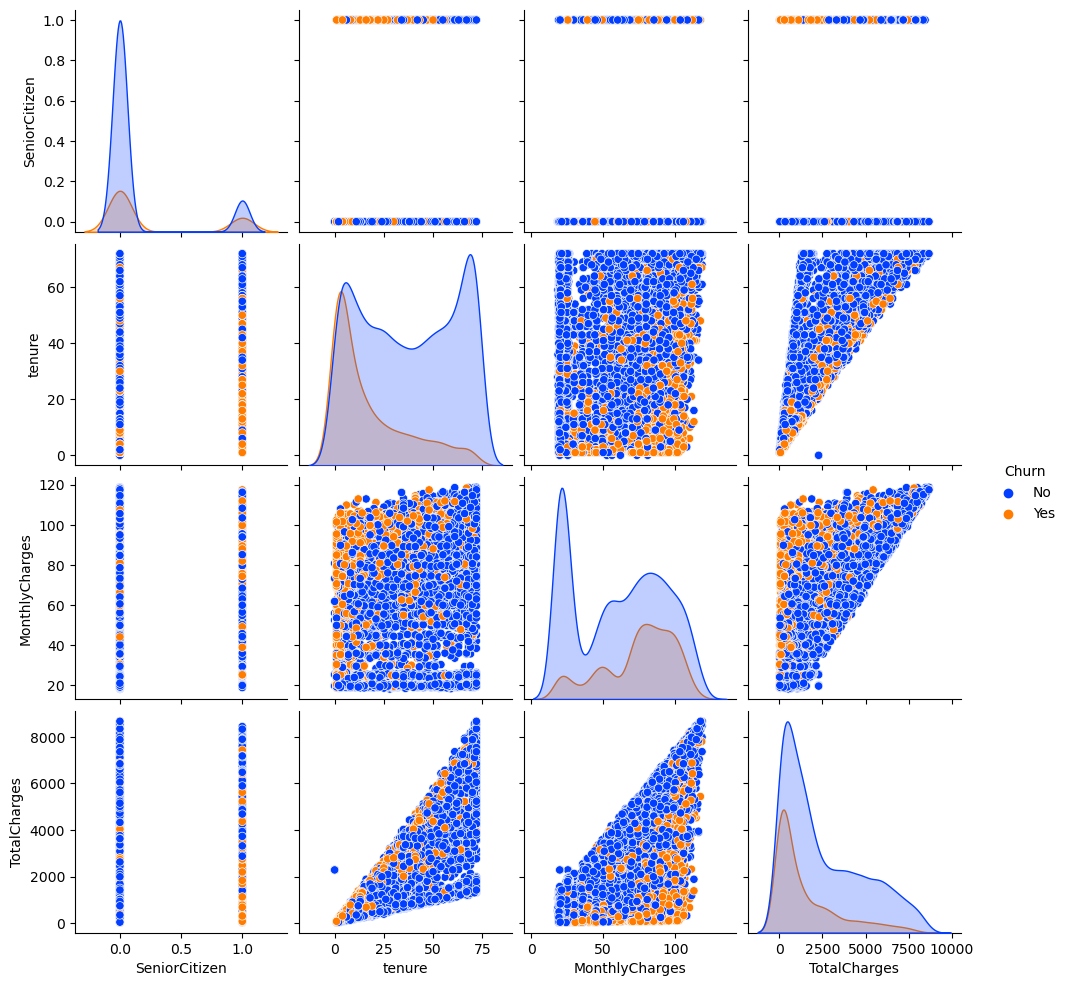

In [71]:
sns.pairplot(df, hue = 'Churn', palette = "bright")
plt.show()

1. Here the pairplot gives the pairwise relation between the features on the basis of target(churn). On the diagonal we can notice the distribution plots.
2. The tenure and TotalCharges, MonthlyCharges and Total charges column have very strong linear relationship with each other.
3. we can't see any outliers present in the graph, but let's plot box plot in order to find out the outliers.

# Checkig for outliers

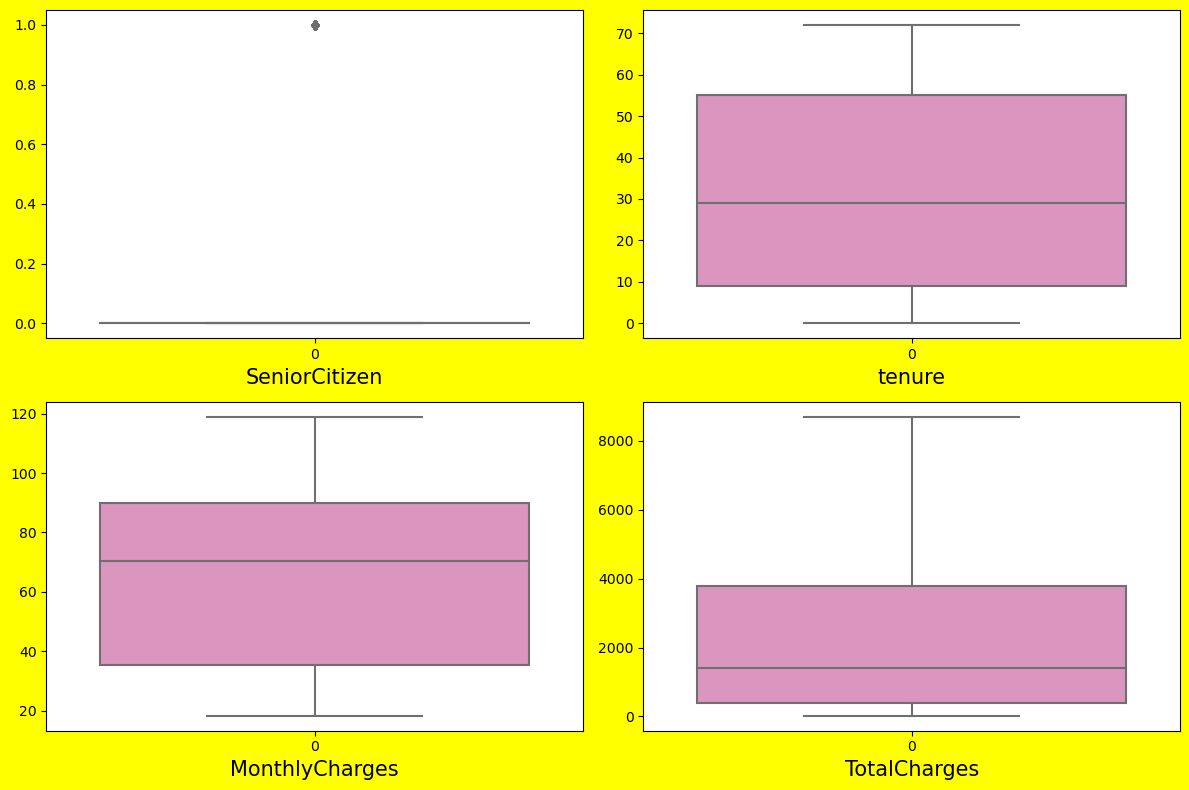

In [72]:
plt.figure(figsize = (12,8), facecolor = 'yellow')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
    plotnumber+=1
plt.tight_layout()

From the above plots we can see that there is only outliers present in the senior sitizen column. But as it contains categorical data, so no need to remove the outliers.

# Checking and removing skewness

In [64]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

(The default acceptable weight of skewness is -0.5 to +0.5. But it is not applicable to all kind of data we have to study it according to the data). here we can see skewness in the senior citizen column, but as it contains categorical data so no need to remove skewness. Since the total charges column is continuous in nature, let's use cube root method to remove the skewness.

In [65]:
#removing the skewness using cuberoot method
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

In [66]:
#checking the skewness again
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.011168
dtype: float64

So here we can see the skewness is removed by the cuberoot method.

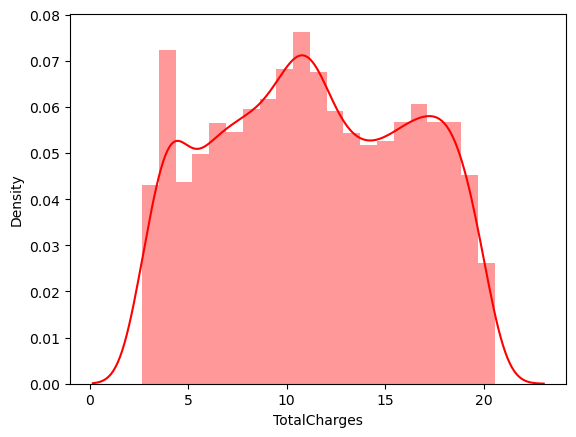

In [67]:
sns.distplot(df['TotalCharges'], color = 'r')
plt.show()

From the above graph we can see that the data of the TotalCharges column is normally distributed.

# Encoding categorical columns

In [68]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


In [69]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


We have converted the categorical columns into numerical columns using ordinal encoder.

In [70]:
# statistical summary of numerical data
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


after encoding the categorical columns we can see all the column details here. This is giving the overall statistical summary of all the columns.

# Correlation between target variable and independent variables.

In [71]:
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


This gives correlation between the dependent and independent variables. We can visualize it by plotting heatmap.

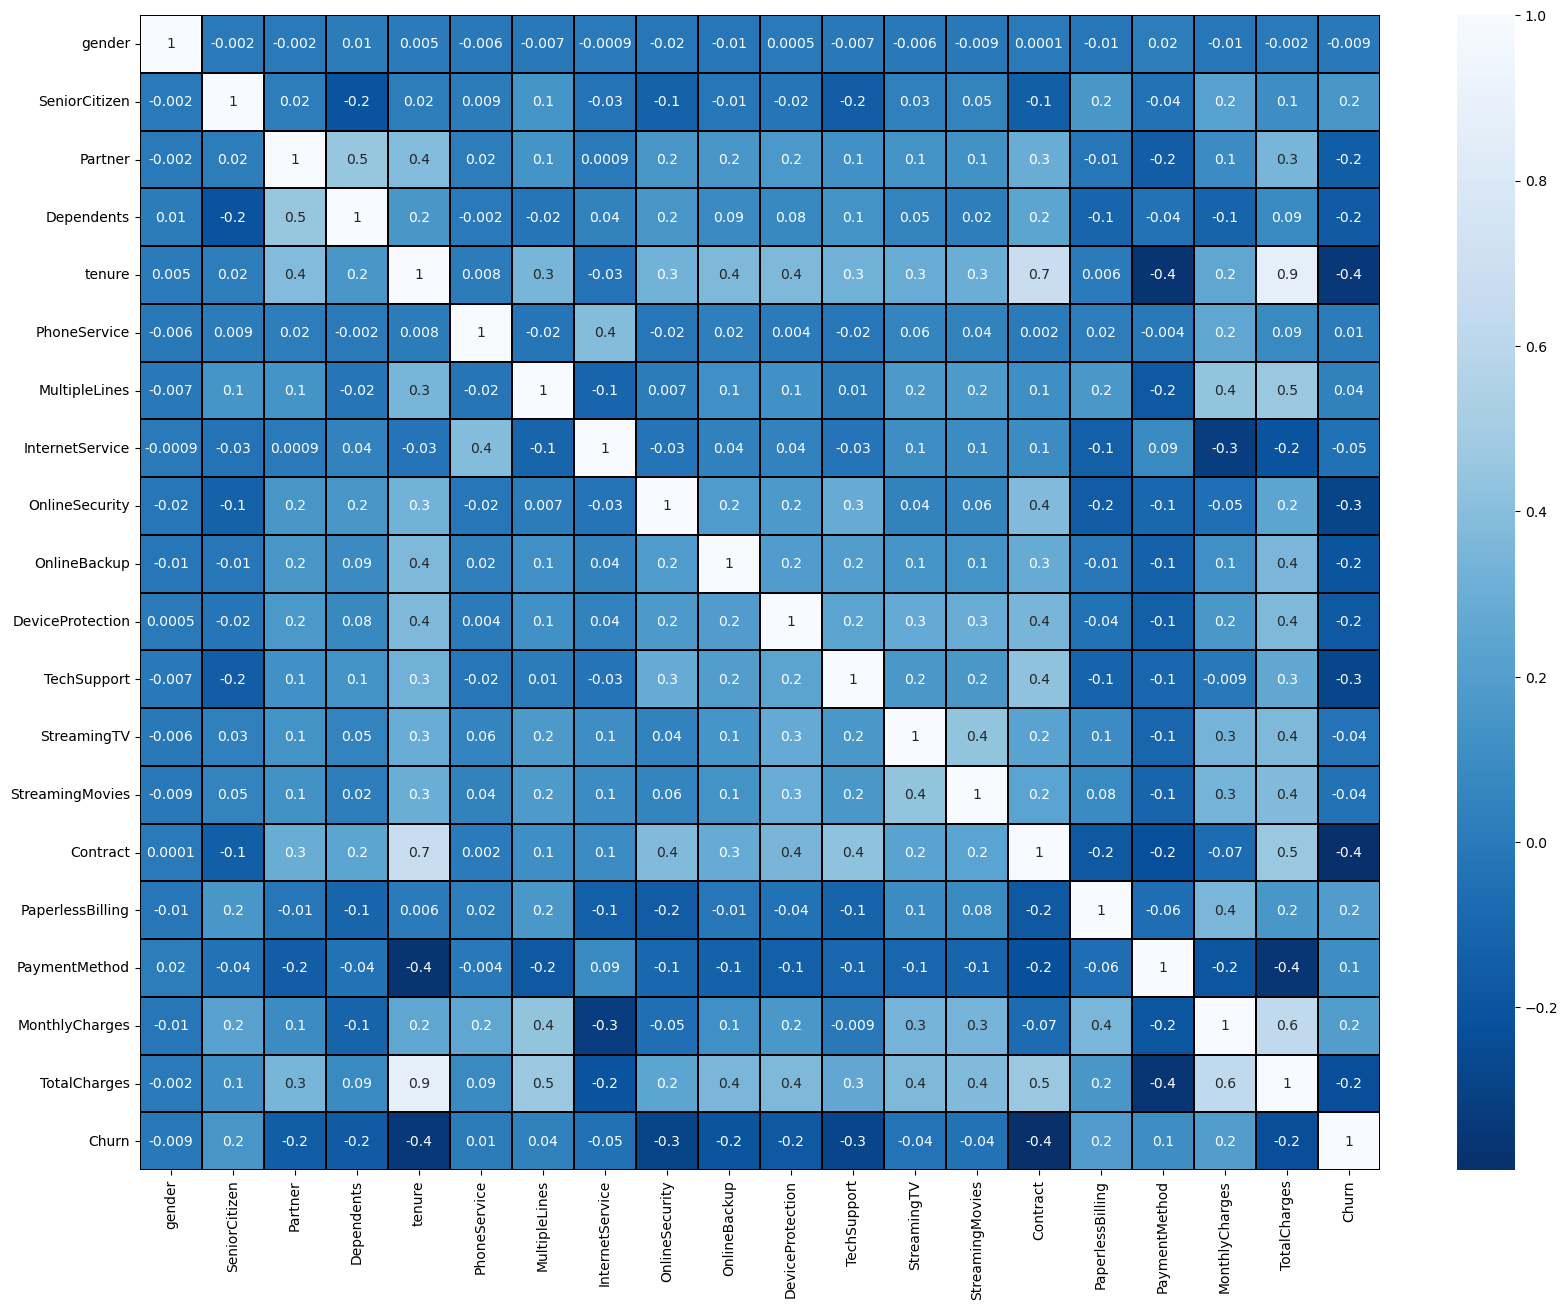

In [72]:
# visualizing the corrrelation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, linecolor = 'black', cmap = 'Blues_r', annot = True, fmt ='.1g')
plt.show()

In [73]:
#0- no correlation, -0.3 to +0.3- less correlation, greater than -0.5 or greater than +0.5 - moderate correlation, greater than -0.7 or grreater than +0.7 high correlation.

This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between feature to feature and feature to label. This heatmap contains both positive and negative correlation.
1) There is no much positive correlation between the target and features.
2) The column MonthlyCharges,PaperlessBilling,SeniorCitizen and PaymentMethod have positive correlation with the label column "Churn".
3) The label is negatively correlated with contact,tenure,OnlineSecurity,TechSupport,TotalCharges,DeviceProtection,OnlineBackup,Partner and Dependents.
4) the gender column has a very less correlation with the label, we can drop if it is necessary.
5) The column TotalCharges and tenure,Contract and tenure,TotalCharges and MonthlyCharges have high correlation with each other.

In [74]:
cor['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can observe the positive and negative correlated features with the target. 

# Separating features and label

In [75]:
x = df.drop("Churn", axis =1)
y = df["Churn"]

In [76]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,12.579230
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,19.454331
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066


In [77]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

So we have separated the features and the target variable.

# Feature scaling

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


We have scaled the data using standard scaler method to overcome the issue of biasness.

# Checking variance inflation factor(VIF)

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif[" Features"] = x.columns

vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking the VIF values we can find the features causing multicollinearity problem. Here we can find the feature Total charges and tenure havve VIF value greater than 10 which means they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [80]:
# Dropping the total charges coluumn
x.drop("TotalCharges", axis = 1, inplace = True)

In [81]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif[" Features"] = x.columns

vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So we have solved the multicolinearity issue. We can now move ahead for model building.

# Handeling the class imbalance issue that we had seen above in the target variable

In [82]:
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

Here we can see that the data is not balanced, since it is a classification problem, we will balance the data using oversampling method.

In [83]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [84]:
y1.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

So here we have solved the class imbalance problem

# Modelling

## Finding the best random state

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
maxAccu = 0
maxRS = 0

for i in range(1, 200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state =i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)       
     

Best accuracy is 0.863768115942029 at random_state 71


 ### Creating train test split

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state = maxRS)

## Classification Algorithms

In [87]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

### Random forest classifier

In [88]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8615136876006442
[[1343  219]
 [ 211 1332]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1562
         1.0       0.86      0.86      0.86      1543

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



### Logistic regression

In [89]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7832528180354267
[[1182  380]
 [ 293 1250]]
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78      1562
         1.0       0.77      0.81      0.79      1543

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



### Support vector classifier

In [90]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8080515297906602
[[1223  339]
 [ 257 1286]]
              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80      1562
         1.0       0.79      0.83      0.81      1543

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



### Gradient boosting classifier

In [91]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8557165861513688
[[1297  265]
 [ 183 1360]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1562
         1.0       0.84      0.88      0.86      1543

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



### AdaBoost Classifier

In [93]:
ABC = AdaBoostClassifier()
ABC.fit (x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.8289855072463768
[[1245  317]
 [ 214 1329]]
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82      1562
         1.0       0.81      0.86      0.83      1543

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



### Bagging classifier

In [94]:
BC = BaggingClassifier()
BC.fit (x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.835426731078905
[[1351  211]
 [ 300 1243]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1562
         1.0       0.85      0.81      0.83      1543

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



### Extra trees classifier

In [96]:
ET = ExtraTreesClassifier()
ET.fit (x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.863768115942029
[[1342  220]
 [ 203 1340]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1562
         1.0       0.86      0.87      0.86      1543

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



## Cross validation score

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
#checking cv score for RandomForest Classifier
score = cross_val_score(RFC,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predRFC) - score.mean())

[0.76859903 0.79178744 0.89323671 0.90285162 0.9062349 ]
0.8525419407261087
Difference between Accuracy score and cross validation score is   0.008971746874535502


In [102]:
#checking cv score for Logistic Regression
score = cross_val_score(LR,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predLR) - score.mean())

[0.76956522 0.76521739 0.77439614 0.78443693 0.78298695]
0.7753205240460164
Difference between Accuracy score and cross validation score is   0.00793229398941031


In [103]:
#checking cv score for Gradient Boosting Classifier
score = cross_val_score(GB,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predGB) - score.mean())

[0.7468599  0.78985507 0.87101449 0.88061866 0.88641856]
0.8349533369290866
Difference between Accuracy score and cross validation score is   0.020763249222282232


In [105]:
#checking cv score for Support Vector machine Classifier
score = cross_val_score(svc,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predsvc) - score.mean())

[0.77294686 0.77439614 0.81449275 0.82455292 0.83518608]
0.8043149506284395
Difference between Accuracy score and cross validation score is   0.003736579162220699


In [106]:
#checking cv score for AdaBoost Classifier
score = cross_val_score(ABC,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predABC) - score.mean())

[0.76425121 0.77777778 0.83478261 0.84630256 0.83663606]
0.8119500423785206
Difference between Accuracy score and cross validation score is   0.01703546486785612


In [108]:
#checking cv score for Extra Trees Classifier
score = cross_val_score(ET,x1,y1, scoring ='accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is  ",accuracy_score(y_test, predET) - score.mean())

[0.80241546 0.80869565 0.89516908 0.90285162 0.90526825]
0.8628800115811274
Difference between Accuracy score and cross validation score is   0.0008881043609015871


Extra Trees Classifier is our best model as the difference between accuracy score and cross validation is least.

### Extra Trees Classifier is our best model

# Hyper parameter tuning

In [203]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameters = {'n_estimators': [50, 100, 150],  
              'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'], 
    'bootstrap': [True, False]  
             }

In [204]:
GCV= GridSearchCV(ExtraTreesClassifier(), parameters)

In [205]:
GCV.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [206]:
GCV.best_params_

{'bootstrap': False,
 'criterion': 'log_loss',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [209]:
Final_model = ExtraTreesClassifier(bootstrap = False, criterion = 'log_loss', max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

86.79549114331722


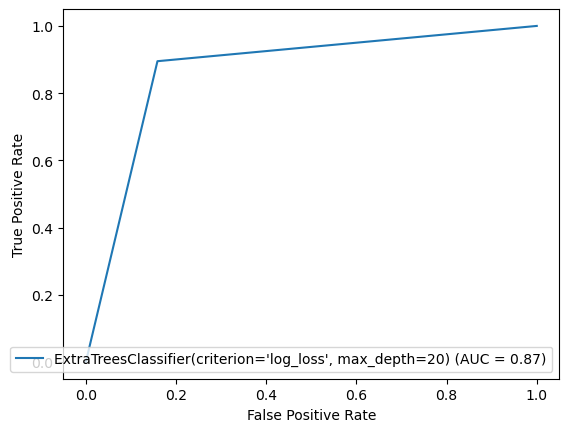

In [210]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name = Final_model)
display.plot()

#### Here we have plotted the ROC curve for the best model and the AUC score is 87%.

## Saving the model

In [211]:
import joblib
joblib.dump(Final_model, "Telecom_Customer_Churn_Analysis.pkl")

['Telecom_Customer_Churn_Analysis.pkl']

## Predicting the saved model 

In [212]:
model = joblib.load('Telecom_Customer_Churn_Analysis.pkl')

prediction = model.predict(x_test)
prediction

array([0., 0., 0., ..., 1., 1., 1.])

These are the predicted "Churn" values of the customers.

In [214]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,1.0,1.0
...,...,...
3100,1.0,1.0
3101,0.0,0.0
3102,1.0,1.0
3103,1.0,1.0
